In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import scipy.stats as stats

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

import warnings

warnings.filterwarnings("ignore")

In [2]:
#!pip install pandas

In [3]:
df = pd.read_csv('Fertilizer Prediction.csv')

In [4]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [5]:
df.tail()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP
98,29,58,57,Black,Sugarcane,12,0,10,20-20


In [6]:
col = df.columns.tolist()
col = col[:3] + col[5:8] + col[3:5]+ col[-1:]
col

['Temparature',
 'Humidity ',
 'Moisture',
 'Nitrogen',
 'Potassium',
 'Phosphorous',
 'Soil Type',
 'Crop Type',
 'Fertilizer Name']

In [7]:
df = df[col]

In [8]:
df.shape

(99, 9)

In [9]:
df.head()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type,Crop Type,Fertilizer Name
0,26,52,38,37,0,0,Sandy,Maize,Urea
1,29,52,45,12,0,36,Loamy,Sugarcane,DAP
2,34,65,62,7,9,30,Black,Cotton,14-35-14
3,32,62,34,22,0,20,Red,Tobacco,28-28
4,28,54,46,35,0,0,Clayey,Paddy,Urea


In [10]:
df.corr(numeric_only=True)

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
Temparature,1.000000,0.973164,0.091222,-0.033771,-0.023424,0.207545
Humidity,0.973164,1.000000,0.091342,-0.060646,-0.003833,0.204044
Moisture,0.091222,0.091342,1.000000,-0.095945,0.027727,0.009276
Nitrogen,-0.033771,-0.060646,-0.095945,1.000000,-0.500087,-0.686971
Potassium,-0.023424,-0.003833,0.027727,-0.500087,1.000000,0.089192
Phosphorous,0.207545,0.204044,0.009276,-0.686971,0.089192,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Nitrogen         99 non-null     int64 
 4   Potassium        99 non-null     int64 
 5   Phosphorous      99 non-null     int64 
 6   Soil Type        99 non-null     object
 7   Crop Type        99 non-null     object
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [12]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Nitrogen           0
Potassium          0
Phosphorous        0
Soil Type          0
Crop Type          0
Fertilizer Name    0
dtype: int64

In [13]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [14]:
df['Soil Type'].value_counts()

Soil Type
Loamy     21
Sandy     20
Clayey    20
Black     19
Red       19
Name: count, dtype: int64

In [15]:
df['Crop Type'].value_counts()

Crop Type
Sugarcane      13
Cotton         12
Millets        11
Pulses         10
Paddy          10
Wheat           9
Barley          7
Oil seeds       7
Tobacco         7
Ground Nuts     7
Maize           6
Name: count, dtype: int64

In [16]:
df['Soil Type'].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [17]:
# from ydata_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_file(output_file = 'output.html')

Text(0.5, 1.0, 'Temperature')

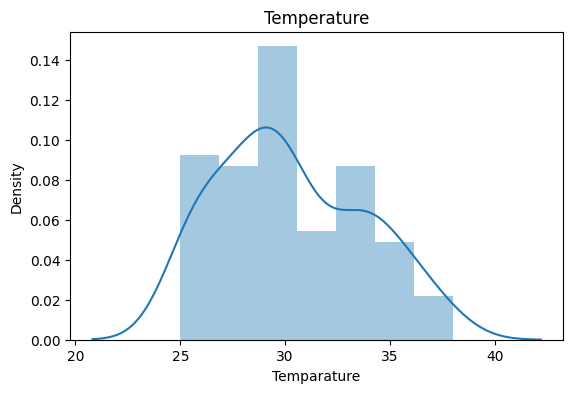

In [18]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
sns.distplot(df['Temparature'])
plt.title('Temperature')

Temparature


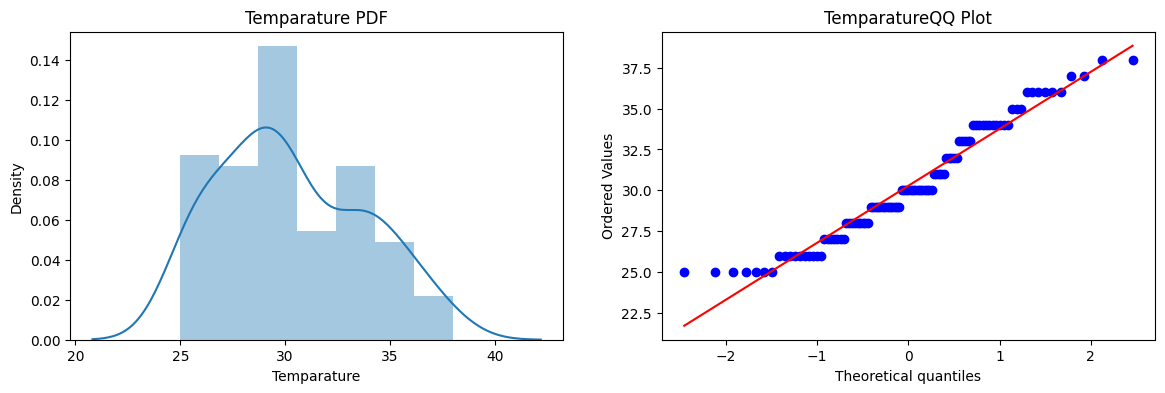

Humidity 


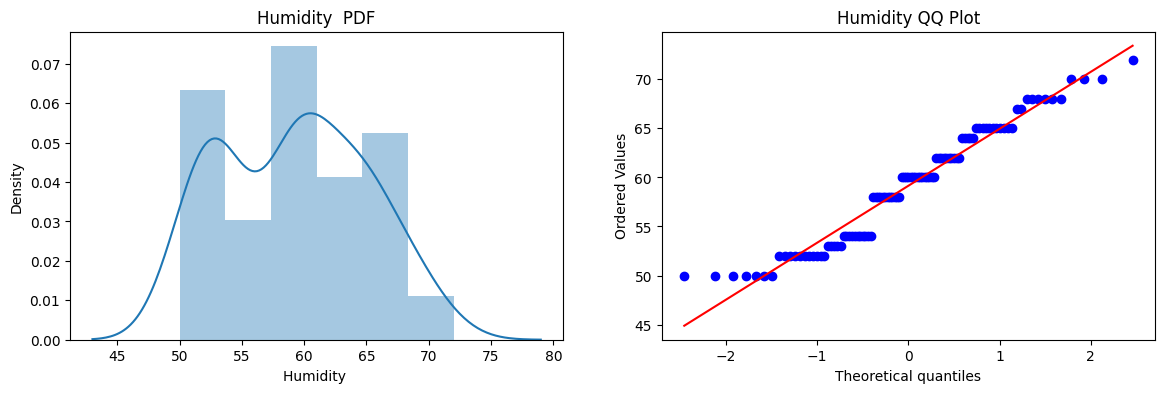

Moisture


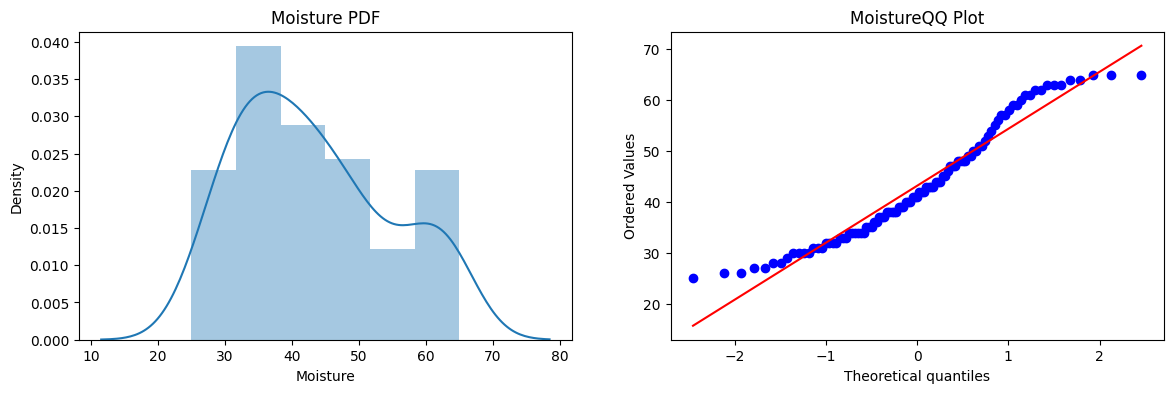

Nitrogen


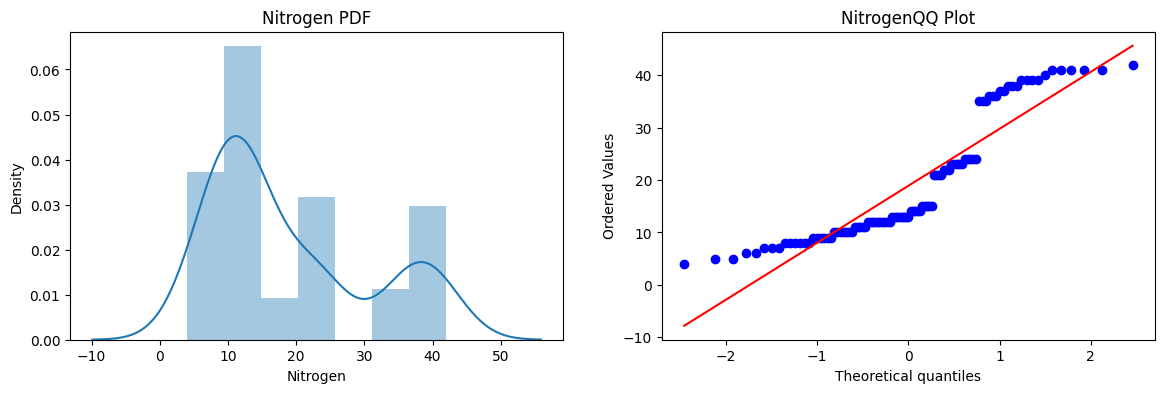

Potassium


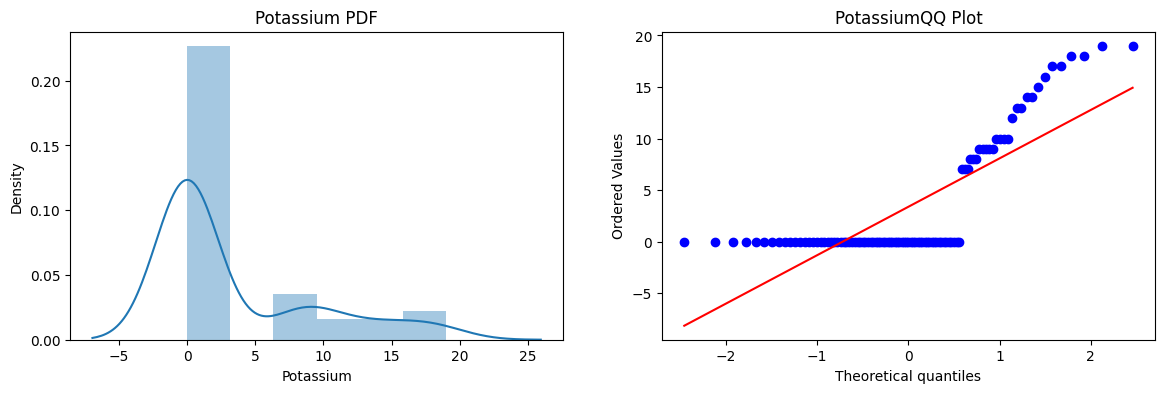

Phosphorous


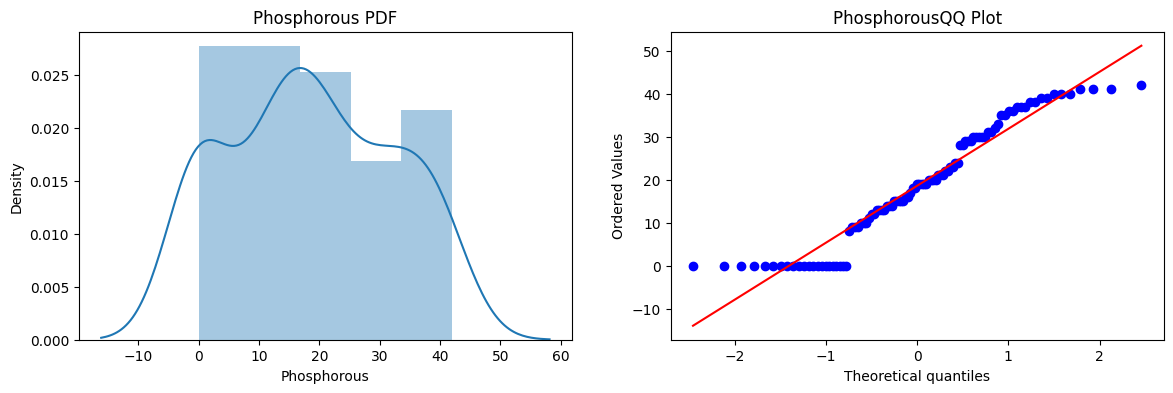

In [19]:
%matplotlib inline
for i in df.drop(columns = ['Soil Type', 'Crop Type', 'Fertilizer Name'], axis=0).columns:
    print(i)
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df[i])
    plt.title(i+" PDF")
    
    plt.subplot(122)
    stats.probplot(df[i], dist="norm", plot=plt)
    plt.title(i+"QQ Plot")
    plt.show()

# Train Test Split

In [20]:
X = df.drop('Fertilizer Name', axis=1)
y = df['Fertilizer Name']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [22]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

<Axes: >

### Applying Function Transform to Potassium

In [23]:
X_train

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type,Crop Type
49,33,64,51,5,9,29,Sandy,Maize
70,26,52,39,21,0,23,Clayey,Pulses
68,25,50,40,6,19,16,Clayey,Pulses
15,31,62,49,10,13,14,Black,Sugarcane
39,29,58,34,15,0,37,Sandy,Millets
...,...,...,...,...,...,...,...,...
60,28,54,41,36,0,0,Clayey,Paddy
71,31,62,32,39,0,0,Red,Tobacco
14,26,52,31,14,0,41,Red,Ground Nuts
92,36,68,41,41,0,0,Red,Ground Nuts


In [24]:
trf = FunctionTransformer(func = np.log1p)
trf0 =  ColumnTransformer(transformers=[
    ('fun', trf, [3,4] )
], remainder='passthrough')

In [25]:
# K_transformed = trf.fit_transform(X_train['Potassium'])
# N_transformed = trf.fit_transform(X_train['Nitrogen'])

In [27]:
#sns.distplot(N_transformed)

In [ ]:
# X_train['Nitrogen'] = N_transformed
# X_train['Potassium'] = K_transformed
# X_train.columns = X_train.columns.astype(str)

# One Hot Encoding for Fertilizer name and Crop Type and Soil Type

In [28]:
# print(X_test.dtypes)
# print(N_transformed.dtype)
# print(K_transformed.dtype)
X_test

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type,Crop Type
62,34,65,64,24,0,20,Black,Cotton
40,27,54,30,13,0,13,Clayey,Pulses
95,30,60,27,4,17,17,Red,Tobacco
18,28,54,65,39,0,0,Black,Cotton
97,36,60,43,15,0,41,Sandy,Millets
84,31,62,44,21,0,28,Sandy,Barley
64,27,53,35,37,0,0,Black,Oil seeds
42,32,62,34,22,0,24,Red,Tobacco
10,27,54,28,13,0,40,Clayey,Pulses
0,26,52,38,37,0,0,Sandy,Maize


In [29]:
trf1 = ColumnTransformer(transformers=[
    ('ohe_label', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), [-2, -1] )
], remainder='passthrough')
trf1

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe_label',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 [-2, -1])])

In [30]:
trf2 = ColumnTransformer(transformers=[
    ('standardisation', StandardScaler(with_mean=False), [0,4])
], remainder='passthrough')

In [45]:
lrp = Pipeline([
        #('fun', trf0),
        ('ohe', trf1) ,
        ('std', trf2),
        ('model', RandomForestClassifier())
    ])

In [46]:
lrp.fit(X_train, y_train)

Pipeline(steps=[('ohe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_label',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [-2, -1])])),
                ('std',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardisation',
                                                  StandardScaler(with_mean=False),
                                                  [0, 4])])),
                ('model', RandomForestClassifier())])

In [47]:
y_pred = lrp.predict(X_test)
y_pred

array(['28-28', '20-20', '10-26-26', 'Urea', 'DAP', '28-28', 'Urea',
       '28-28', 'DAP', 'Urea', 'DAP', '28-28', '28-28', '14-35-14', 'DAP',
       'Urea', 'DAP', 'Urea', '17-17-17', 'Urea'], dtype=object)

In [48]:
accuracy_score(y_test, y_pred)

0.95

In [49]:
np.mean(cross_val_score(lrp, X_train, y_train, scoring = 'accuracy', cv=10))

np.float64(0.9482142857142858)

In [50]:
import pickle

In [51]:
file = pickle.dump(lrp, open(f'models/fertilizer_recommendation.pkl', 'wb'))

In [52]:
lrp.predict(X_test.iloc[[0]])

array(['28-28'], dtype=object)

In [53]:
single_instance = pd.DataFrame(np.array([[89, 65, 32, 24, 23, 34, 'Clayey', 'Millets']]), 
                               columns=X_test.columns)
lrp.predict(single_instance)

array(['14-35-14'], dtype=object)

In [54]:
np.array(X_test.iloc[0]).shape

(8,)

In [55]:
X_test.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium',
       'Phosphorous', 'Soil Type', 'Crop Type'],
      dtype='object')

In [56]:
import sklearn
sklearn.__version__

'1.5.2'

In [ ]:
#!pip install seaborn